In [ ]:
# ONLY FOR COLAB
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set base directory (main project directory in Google Drive)
BASE_DIR = "/content/drive/My Drive/Energy_prediction"

# Check if the path is correct
print(f"Base directory set to: {BASE_DIR}")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Base directory set to: /content/drive/My Drive/Energy_prediction


In [47]:
# Set path to the data file
data_path = os.path.join(BASE_DIR, "data", "raw", "energy_consumption_raw.csv")

df = pd.read_csv(data_path, sep=",")
df.head()

,datetime,consumption_MW,temperature_c
0,2011-01-01 01:00:00,96310,12.95
1,2011-01-01 02:00:00,92730,12.78
2,2011-01-01 03:00:00,90110,12.53
3,2011-01-01 04:00:00,87410,13.35
4,2011-01-01 05:00:00,86940,8.75


In [48]:
#FOR LOCAL
import os
import pandas as pd
import numpy as np

# Lade die Daten
df = pd.read_csv("../../data/raw/energy_consumption_raw.csv", sep=",")  # Falls nötig, Trennzeichen anpassen

# Zeige die ersten Zeilen
df.head()


,datetime,consumption_MW,temperature_c
0,2011-01-01 01:00:00,96310,12.95
1,2011-01-01 02:00:00,92730,12.78
2,2011-01-01 03:00:00,90110,12.53
3,2011-01-01 04:00:00,87410,13.35
4,2011-01-01 05:00:00,86940,8.75


In [49]:
#Time in date format umwandeln
df["datetime"] = pd.to_datetime(df["datetime"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66497 entries, 0 to 66496
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   datetime        66497 non-null  datetime64[ns]
 1   consumption_MW  66497 non-null  int64         
 2   temperature_c   66490 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.5 MB


In [50]:
# Anzahl der fehlenden Werte pro Spalte
print(df.isna().sum())

# Gesamtanzahl der fehlenden Werte
print(f"Anzahl fehlender Werte: {df.isna().sum().sum()}")


datetime          0
consumption_MW    0
temperature_c     7
dtype: int64
Anzahl fehlender Werte: 7


In [51]:
df[df["temperature_c"].isna()]


,datetime,consumption_MW,temperature_c
56660,2017-06-19 04:00:00,90890,NaN
58077,2017-08-17 05:00:00,110110,NaN
58078,2017-08-17 06:00:00,110190,NaN
58079,2017-08-17 07:00:00,116560,NaN
58080,2017-08-17 08:00:00,126110,NaN
58081,2017-08-17 09:00:00,133440,NaN
59204,2017-10-03 04:00:00,87610,NaN


In [52]:
# interpolate nas in temp and chek after if these make sense
df.set_index("datetime", inplace=True)

# Kopiere für Vergleich
df_before = df["temperature_c"].copy()

# Interpolation
df["temperature_c"] = df["temperature_c"].interpolate(method="time")

# Vergleiche betroffene Stellen (um je 1 davor und danach)
relevant_times = [
    "2017-06-19 03:00:00", "2017-06-19 04:00:00", "2017-06-19 05:00:00",
    "2017-08-17 04:00:00", "2017-08-17 05:00:00", "2017-08-17 06:00:00", "2017-08-17 07:00:00", "2017-08-17 08:00:00", "2017-08-17 09:00:00", "2017-08-17 10:00:00",
    "2017-10-03 03:00:00", "2017-10-03 04:00:00", "2017-10-03 05:00:00"
]

# Ausgabe in DataFrame-Form
df_check = df.loc[relevant_times][["consumption_MW", "temperature_c"]].copy()
df_check["temp_before"] = df_before.loc[relevant_times]
df_check.reset_index(inplace=True)

import pandas as pd
from IPython.display import display
display(df_check)

# Index zurücksetzen (falls nötig)
df.reset_index(inplace=True)

,datetime,consumption_MW,temperature_c,temp_before
0,2017-06-19 03:00:00,93550,23.310000,23.31
1,2017-06-19 04:00:00,90890,22.230000,NaN
2,2017-06-19 05:00:00,89220,21.150000,21.15
3,2017-08-17 04:00:00,113120,26.750000,26.75
4,2017-08-17 05:00:00,110110,26.183333,NaN
5,2017-08-17 06:00:00,110190,25.616667,NaN
6,2017-08-17 07:00:00,116560,25.050000,NaN
7,2017-08-17 08:00:00,126110,24.483333,NaN
8,2017-08-17 09:00:00,133440,23.916667,NaN
9,2017-08-17 10:00:00,137880,23.350000,23.35


In [53]:
print(df["temperature_c"].isna().sum())


0


In [54]:
df.info()  # Sind alle Spalten im richtigen Format?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66497 entries, 0 to 66496
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   datetime        66497 non-null  datetime64[ns]
 1   consumption_MW  66497 non-null  int64         
 2   temperature_c   66497 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.5 MB


In [55]:
#Overview
df.describe()

,datetime,consumption_MW,temperature_c
count,66497,66497.000000,66497.000000
mean,2014-10-17 14:11:46.389762048,114201.521121,11.469851
min,2011-01-01 01:00:00,72370.000000,-25.650000
25%,2012-11-23 21:00:00,97800.000000,2.250000
50%,2014-10-17 16:00:00,111520.000000,11.750000
75%,2016-09-09 08:00:00,125100.000000,21.150000
max,2018-08-03 00:00:00,237530.000000,39.450000
std,NaN,23041.395173,11.585102


In [56]:
df.head(10)

,datetime,consumption_MW,temperature_c
0,2011-01-01 01:00:00,96310,12.95
1,2011-01-01 02:00:00,92730,12.78
2,2011-01-01 03:00:00,90110,12.53
3,2011-01-01 04:00:00,87410,13.35
4,2011-01-01 05:00:00,86940,8.75
5,2011-01-01 06:00:00,87110,6.15
6,2011-01-01 07:00:00,89430,4.45
7,2011-01-01 08:00:00,92220,3.70
8,2011-01-01 09:00:00,94300,2.78
9,2011-01-01 10:00:00,96700,0.65


In [58]:
#check for duplicates
# Prüfen, ob es doppelte Einträge in der Spalte 'Time' gibt
duplicates = df[df.duplicated(subset='datetime', keep=False)]

if not duplicates.empty:
    print(f"Es gibt {len(duplicates)} doppelte Einträge in der Spalte 'datetime'.")
    print("Beispiele für doppelte Einträge:")
    print(duplicates.head())
else:
    print("Es gibt keine doppelten Einträge in der Spalte 'datetime'.")

Es gibt 8 doppelte Einträge in der Spalte 'datetime'.
Beispiele für doppelte Einträge:
                 datetime  consumption_MW  temperature_c
33618 2014-11-02 02:00:00           91840           3.35
33619 2014-11-02 02:00:00           88690           3.35
42354 2015-11-01 02:00:00           82700          11.85
42355 2015-11-01 02:00:00           79230          11.85
51258 2016-11-06 02:00:00           80280          13.95


In [60]:
# Duplikate in 'date' erkennen – nur einen behalten
df = df.drop_duplicates(subset="datetime", keep="first").reset_index(drop=True)

print(f"Neue Anzahl Zeilen: {len(df)}")


Neue Anzahl Zeilen: 66493


In [61]:
#Daten ins richtige Format bringen

#erste Spalte muss date heisen
df.rename(columns={df.columns[0]: "date"}, inplace=True)
df.rename(columns= {df.columns[1]: "consumption_MW"}, inplace=True)
df.rename(columns= {df.columns[2]: "temperature_c"}, inplace=True)

#Spalte date richtig formatieren
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Finde das erste Timestamp mit Uhrzeit 00:00:00
first_midnight_idx = df[df["date"].dt.time == pd.to_datetime("00:00:00").time()].index[0]

# Schneide alle Zeilen davor weg
df = df.loc[first_midnight_idx:].reset_index(drop=True)

#Date geht NICHT als feature in modell, daher stunden/wochentage etc als numerische Var erstellen

#Lege Tagesstunde als Variable an. Sin/Cas Transformation um zyklischen Zusammenhang darzustellen, ansonsten Stunde 23 für modell weit von 0 entfernt
df['hour_sin'] = np.sin(2 * np.pi * pd.to_datetime(df['date']).dt.hour / 24)
df['hour_cos'] = np.cos(2 * np.pi * pd.to_datetime(df['date']).dt.hour / 24)

# Wochentag (0=Montag, 6=Sonntag)
df['weekday'] = df['date'].dt.weekday
df['weekday_sin'] = np.sin(2 * np.pi * df['weekday'] / 7)
df['weekday_cos'] = np.cos(2 * np.pi * df['weekday'] / 7)
df.drop(columns=['weekday'], inplace=True)  # optional

# Wochenende ja/nein --> drop, no influence
#df['is_weekend'] = df['date'].dt.weekday >= 5
#df['is_weekend'] = df['is_weekend'].astype(int)

# Gleitender Mittelwert über die letzten 6 Stunden:
# Glättet kurzfristige Schwankungen im Verbrauchsverhalten,
# hilft dem Modell Trends von zufälligem Rauschen zu unterscheiden
df['rolling_mean_6h'] = df['consumption_MW'].rolling(window=6).mean()

# Monate als Sine/Cosine-Transformation, gleich wie bei Tag, zyklus wwichtig
df['month_sin'] = np.sin(2 * np.pi * pd.to_datetime(df['date']).dt.month / 12)
df['month_cos'] = np.cos(2 * np.pi * pd.to_datetime(df['date']).dt.month / 12)

# Verbrauch zur gleichen Uhrzeit letzte Woche (7 Tage = 24*7 = 168 Stunden)
df["consumption_last_week"] = df["consumption_MW"].shift(168)
df["consumption_yesterday"] = df["consumption_MW"].shift(24)
df["consumption_last_hour"] = df["consumption_MW"].shift(1)

#delete raws wirth nas, is the first week because "consumption_last_week" has no values for that
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)



In [62]:
df.head(150)

,date,consumption_MW,temperature_c,hour_sin,hour_cos,weekday_sin,weekday_cos,rolling_mean_6h,month_sin,month_cos,consumption_last_week,consumption_yesterday,consumption_last_hour
0,2011-01-09 00:00:00,120110,-6.75,0.000000,1.000000,-0.781831,0.623490,128378.333333,0.5,0.866025,117780.0,127240.0,126070.0
1,2011-01-09 01:00:00,114690,-7.25,0.258819,0.965926,-0.781831,0.623490,125473.333333,0.5,0.866025,111990.0,120440.0,120110.0
2,2011-01-09 02:00:00,109360,-7.85,0.500000,0.866025,-0.781831,0.623490,121706.666667,0.5,0.866025,106820.0,114940.0,114690.0
3,2011-01-09 03:00:00,106340,-8.08,0.707107,0.707107,-0.781831,0.623490,117590.000000,0.5,0.866025,103760.0,112180.0,109360.0
4,2011-01-09 04:00:00,105310,-8.95,0.866025,0.500000,-0.781831,0.623490,113646.666667,0.5,0.866025,102470.0,110350.0,106340.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2011-01-15 01:00:00,114490,-5.65,0.258819,0.965926,-0.974928,-0.222521,128330.000000,0.5,0.866025,120440.0,116430.0,121200.0
146,2011-01-15 02:00:00,108920,-5.65,0.500000,0.866025,-0.974928,-0.222521,123463.333333,0.5,0.866025,114940.0,111730.0,114490.0
147,2011-01-15 03:00:00,105730,-5.63,0.707107,0.707107,-0.974928,-0.222521,118496.666667,0.5,0.866025,112180.0,108810.0,108920.0
148,2011-01-15 04:00:00,103430,-5.65,0.866025,0.500000,-0.974928,-0.222521,113683.333333,0.5,0.866025,110350.0,107030.0,105730.0


In [63]:
# Prüfen, ob es doppelte Einträge in der Spalte 'Time' gibt
duplicates = df[df.duplicated(subset='date', keep=False)]

if not duplicates.empty:
    print(f"Es gibt {len(duplicates)} doppelte Einträge in der Spalte 'Time'.")
    print("Beispiele für doppelte Einträge:")
    print(duplicates.head())
else:
    print("Es gibt keine doppelten Einträge in der Spalte 'date'.")

Es gibt keine doppelten Einträge in der Spalte 'date'.


In [64]:
df.head(-1)

,date,consumption_MW,temperature_c,hour_sin,hour_cos,weekday_sin,weekday_cos,rolling_mean_6h,month_sin,month_cos,consumption_last_week,consumption_yesterday,consumption_last_hour
0,2011-01-09 00:00:00,120110,-6.75,0.000000,1.000000,-0.781831,0.623490,128378.333333,0.500000,0.866025,117780.0,127240.0,126070.0
1,2011-01-09 01:00:00,114690,-7.25,0.258819,0.965926,-0.781831,0.623490,125473.333333,0.500000,0.866025,111990.0,120440.0,120110.0
2,2011-01-09 02:00:00,109360,-7.85,0.500000,0.866025,-0.781831,0.623490,121706.666667,0.500000,0.866025,106820.0,114940.0,114690.0
3,2011-01-09 03:00:00,106340,-8.08,0.707107,0.707107,-0.781831,0.623490,117590.000000,0.500000,0.866025,103760.0,112180.0,109360.0
4,2011-01-09 04:00:00,105310,-8.95,0.866025,0.500000,-0.781831,0.623490,113646.666667,0.500000,0.866025,102470.0,110350.0,106340.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66296,2018-08-02 19:00:00,168970,30.05,-0.965926,0.258819,0.433884,-0.900969,167511.666667,-0.866025,-0.500000,152440.0,155690.0,170680.0
66297,2018-08-02 20:00:00,164370,29.45,-0.866025,0.500000,0.433884,-0.900969,168116.666667,-0.866025,-0.500000,145790.0,151220.0,168970.0
66298,2018-08-02 21:00:00,155900,29.18,-0.707107,0.707107,0.433884,-0.900969,166460.000000,-0.866025,-0.500000,139450.0,144490.0,164370.0
66299,2018-08-02 22:00:00,150860,29.45,-0.500000,0.866025,0.433884,-0.900969,163488.333333,-0.866025,-0.500000,136260.0,142460.0,155900.0


In [65]:
#store
data_path = os.path.join(BASE_DIR, "data", "processed", "energy_consumption_aggregated_cleaned_proto.csv")
df.to_csv(data_path, index=False)

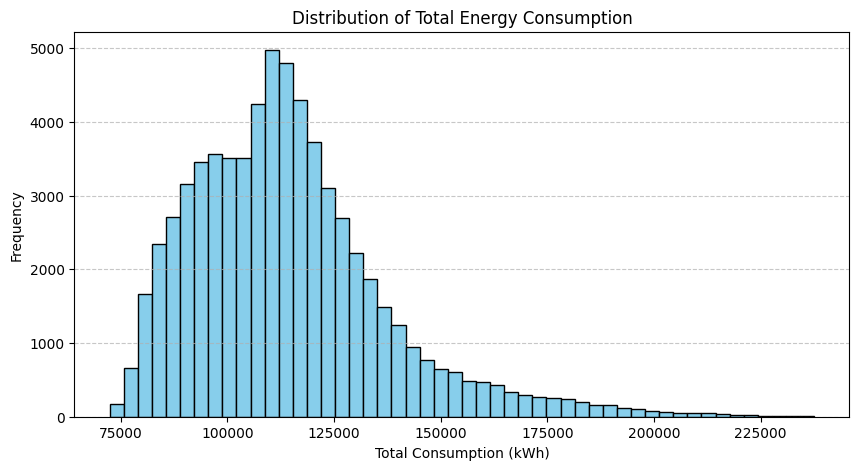

In [66]:
#plot Distribution of Total Energy Consumption

plt.figure(figsize=(10, 5))
plt.hist(df['consumption_MW'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Total Consumption (kWh)')
plt.ylabel('Frequency')
plt.title('Distribution of Total Energy Consumption')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


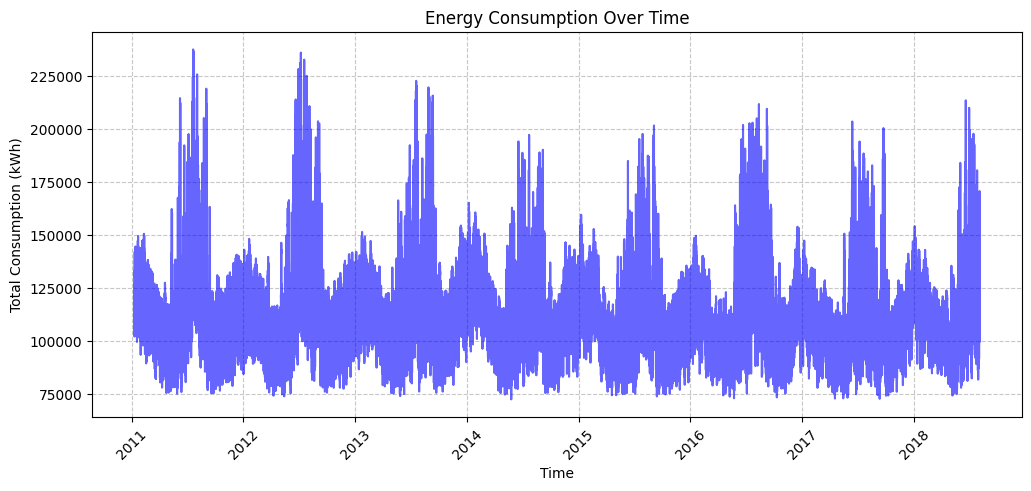

In [67]:
#plot Total Consumption (kWh)

plt.figure(figsize=(12, 5))
plt.plot(df['date'], df['consumption_MW'], color='blue', alpha=0.6)
plt.xlabel('Time')
plt.ylabel('Total Consumption (kWh)')
plt.title('Energy Consumption Over Time')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


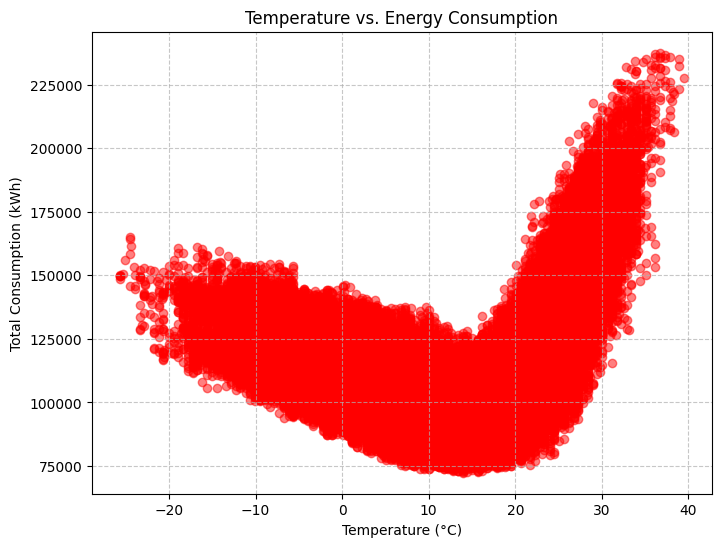

In [68]:
#plot Temperature vs. Energy Consumption

plt.figure(figsize=(8, 6))
plt.scatter(df['temperature_c'], df['consumption_MW'], alpha=0.5, color='red')
plt.xlabel('Temperature (°C)')
plt.ylabel('Total Consumption (kWh)')
plt.title('Temperature vs. Energy Consumption')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
